![picture](https://storage.googleapis.com/kaggle-datasets-images/3955442/6884731/c956f6130e70bb9cae35ae06233824b6/dataset-cover.png?t=2023-11-16-19-55-14)

**<font size=4>Description:</font>**

**<font size=2>The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.</font>**

**<font size=2>The dataset aims to provide insights into the relationship between the predictor variables and the performance index, and i want to use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.</font>**

**Dataset source link**: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

In [1]:
#This is to import the library needed while some will be needed in the project.

import pandas as pd                #imports the pandas library
import numpy as np                 #imports the numpy library
import matplotlib.pyplot as plt    #imports the matplotlib library
import seaborn as sns              #imports the seaborn library
import warnings                    #to ignore warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# This line of code imports the data and converts it into a pandas dataframe
student_performance = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

In [3]:
#This line of code will display the number of observations(rows) and features(columns) in the dataset
row,column=student_performance.shape
print(f"The student performance dataset contain {row} rows and {column} columns")

The student performance dataset contain 10000 rows and 6 columns


In [4]:
#This will show the first three rows about the dataset

student_performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### Predictor Variables

    Hours Studied : The total number of hours spent studying by each student.
    Previous Scores : The scores obtained by students in previous tests.
    Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
    Sleep Hours : The average number of hours of sleep the student had per day.
    Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable

    Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 0 to 100, with higher values indicating better performance.

In [5]:
#This will show the last three rows about the dataset

student_performance.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [6]:
#This info() will show the information about the sets incuding column name, count and data type

student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
#This is for checking duplication in the dataset

student_performance.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [8]:
#data.isnull().sum() is used to get the number of missing records in each column

print("Let understand the sum of Null values in each columns ")
student_performance.isnull().sum()

Let understand the sum of Null values in each columns 


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
#This provides a statistics summary of all data, include object, category etc
student_performance.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


**This shows the summary statistics of the numerical variable, i.e the mean, standard deviation, minimum, lower quartile, interquartile, upper quartile and maxinmum vaues of each variables**

In [10]:
#This provides a statistics summary of only object dataset

student_performance.describe(include="object").T

,count,unique,top,freq
Extracurricular Activities,10000,2,No,5052


**This shows the summary of object variable and the output indicate that the unique sets in the variable are two while "No" has the highest frequency of 5052 out of the total count of the data set 10000**

**The purpose of grouping Performance Index into categories is to simplify analysis, aid in pattern recognition, facilitate comparison, and enhance visualization, ultimately leading to a better understanding of the data and potentially improving the effectiveness of subsequent modelling efforts.**

In [11]:
#This categorizes the Performance Index values into predefined bins and assigns the corresponding labels to each value based on the specified intervals and labels.

category = pd.cut(student_performance['Performance Index'], bins=[0, 39, 49, 59, 69, 100], labels=['Fail', 'Pass', 'Credit', 'Merit', 'Distinction'])

In [12]:
#This code create a new column named 'Performance Index Group', containing the performance index group categories based on the predefined bins and labels.

student_performance.insert(6,'Performance Index Group',category)

In [13]:
#This will show the first three rows about the dataset

student_performance.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Index Group
8837,8,70,No,5,2,63.0,Merit
4432,3,85,No,9,2,62.0,Merit
3769,6,87,Yes,7,0,78.0,Distinction


In [14]:
#This info() will show the information about the sets incuding column name, count and data type

student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Hours Studied                     10000 non-null  int64   
 1   Previous Scores                   10000 non-null  int64   
 2   Extracurricular Activities        10000 non-null  object  
 3   Sleep Hours                       10000 non-null  int64   
 4   Sample Question Papers Practiced  10000 non-null  int64   
 5   Performance Index                 10000 non-null  float64 
 6   Performance Index Group           10000 non-null  category
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 478.8+ KB


### Data_visualisation

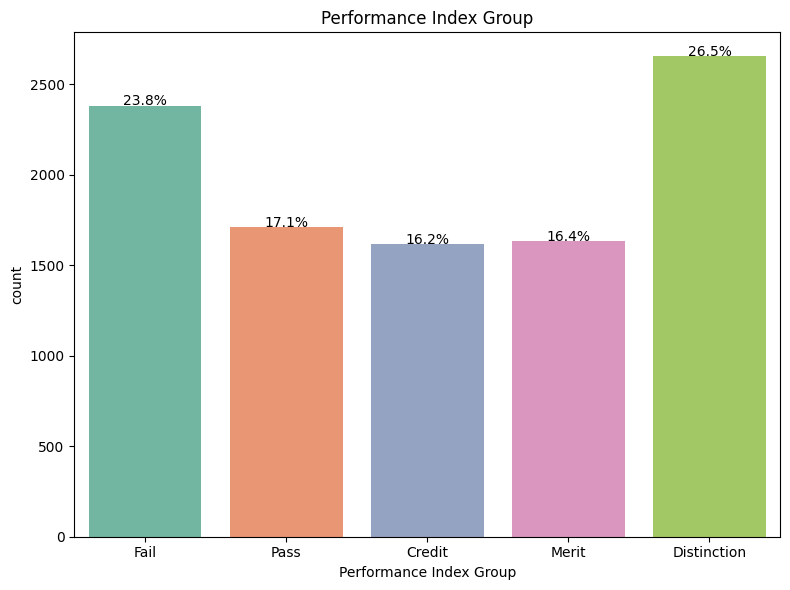

In [15]:
plt.figure(figsize=(8, 6))

# Plot countplot for Performance Index Group
sns.countplot(x="Performance Index Group", data=student_performance, palette="Set2")
plt.title("Performance Index Group")

# Add percentage labels
total = float(len(student_performance))  # Total number of samples
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height/total:.1%}', ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**The count plot above shows the distribution of the Performance Index Group. 26.5% students had Distinction, 23.8% students failed while the rest passed with pass mark, credit and merit.**

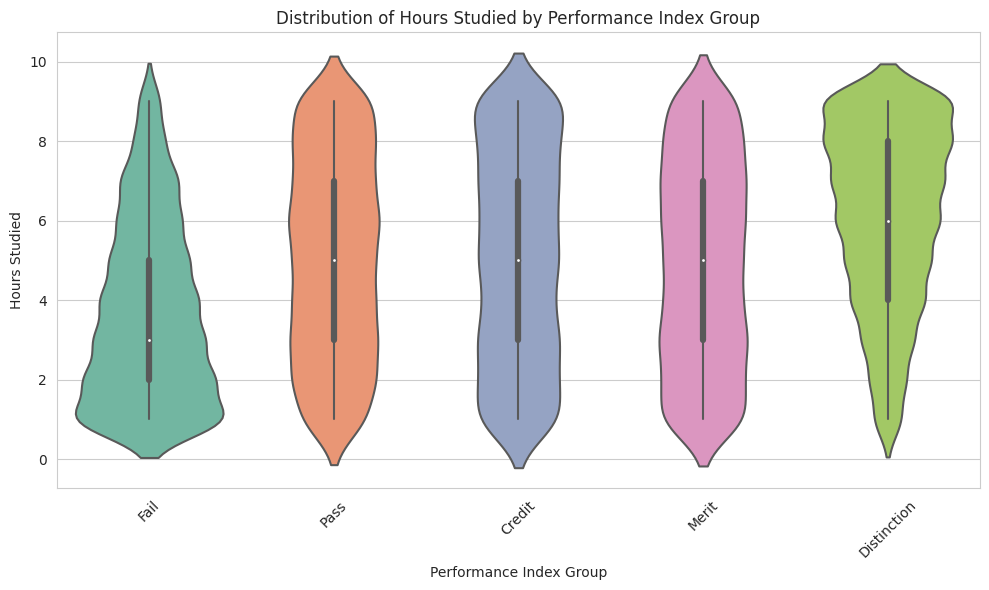

In [16]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a combined plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Performance Index Group", y="Hours Studied", data=student_performance, palette="Set2")
plt.title("Distribution of Hours Studied by Performance Index Group")
plt.xlabel("Performance Index Group")
plt.ylabel("Hours Studied")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

**The violin plot above shows the effectiveness of hours studied in Performance Index Group.The Fail and Distinction curve indicate that the higher the studied hours the better the result.**

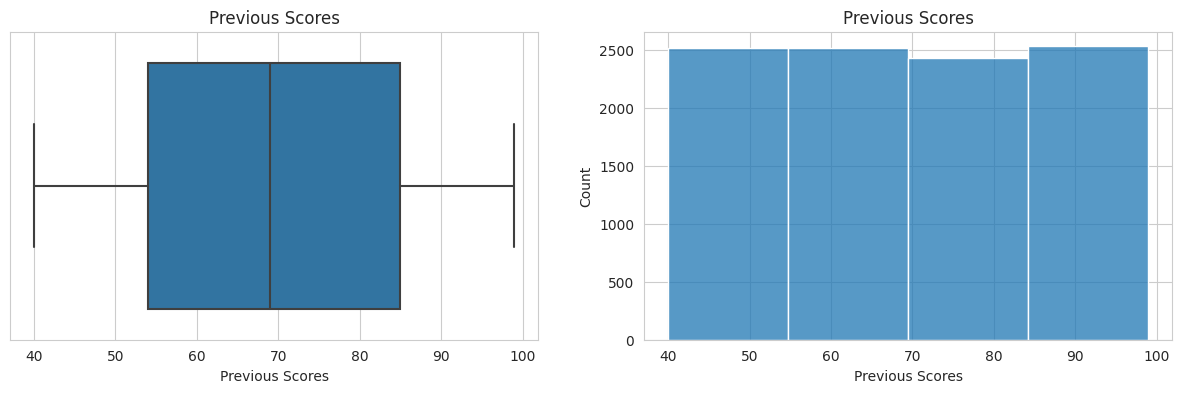

In [17]:
#define functions for visualizations

def boxplot(column_name):
    fig,ax=plt.subplots(1,2,figsize=(15,4))
    sns.boxplot(data=student_performance, x=column_name, ax=ax[0])
    sns.histplot(data=student_performance, x=column_name, bins=4, ax=ax[1])
    ax[0].set_title(column_name)
    ax[1].set_title(column_name)
    plt.show()

boxplot("Previous Scores")

**The Box plot above shows that Average Previous Scores is 70 points with a minimum of 40 and a maximum of 100.**

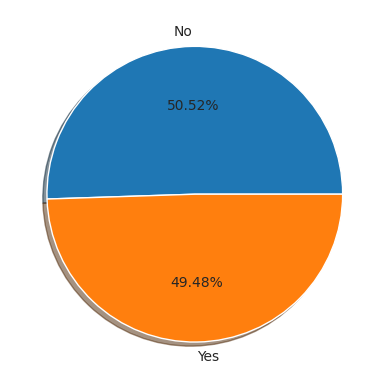

In [18]:
#define functions for visualizations

def pieplot(column_name):
    plt.pie(x=student_performance[column_name].value_counts(),
            labels=student_performance[column_name].value_counts().index,
            autopct="%1.2f%%", shadow=True)
    plt.show()

pieplot("Extracurricular Activities")

**The above pie plot shows that Half of the students, specifically 50%, actively engage in extracurricular activities, while the remaining 50% of students do not partake in such activities.**

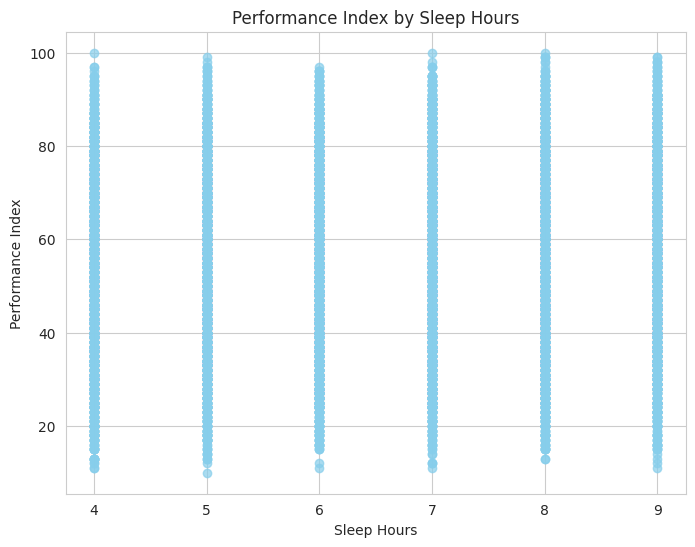

In [19]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(student_performance['Sleep Hours'], student_performance['Performance Index'], color='skyblue', alpha=0.7)
plt.title('Performance Index by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

**The above scatter plot indicate that the number of sleep hours does not lead to an improvement in performance; everything remains balanced.**

<Figure size 1200x800 with 0 Axes>

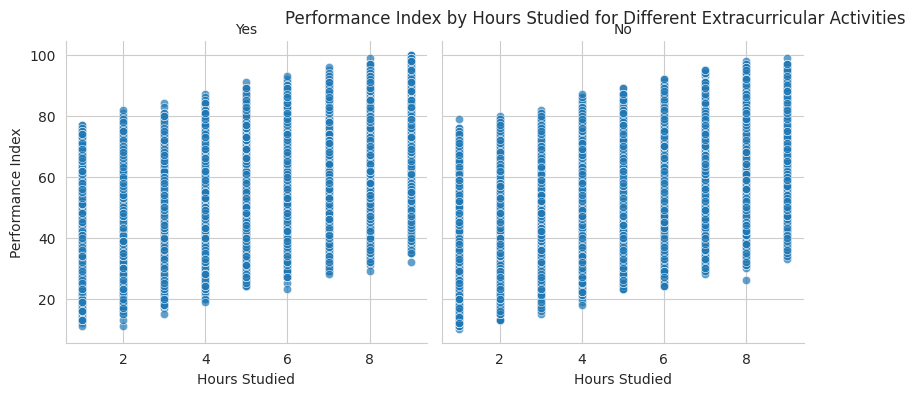

In [20]:
# Create a scatter plot with facet grid for Extracurricular Activities
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(student_performance, col='Extracurricular Activities', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Hours Studied', 'Performance Index', alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels('Hours Studied', 'Performance Index')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Performance Index by Hours Studied for Different Extracurricular Activities')
plt.show()

**This multivariate scartter plot of Performance Index by hours studied for different extracurricular activities shows that only hours studied contributed to the performance index while extracurricular activities does not**

In [21]:
# Convert 'Extracurricular Activities' to numeric encoding
student_performance['Extracurricular Activities'] = student_performance['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

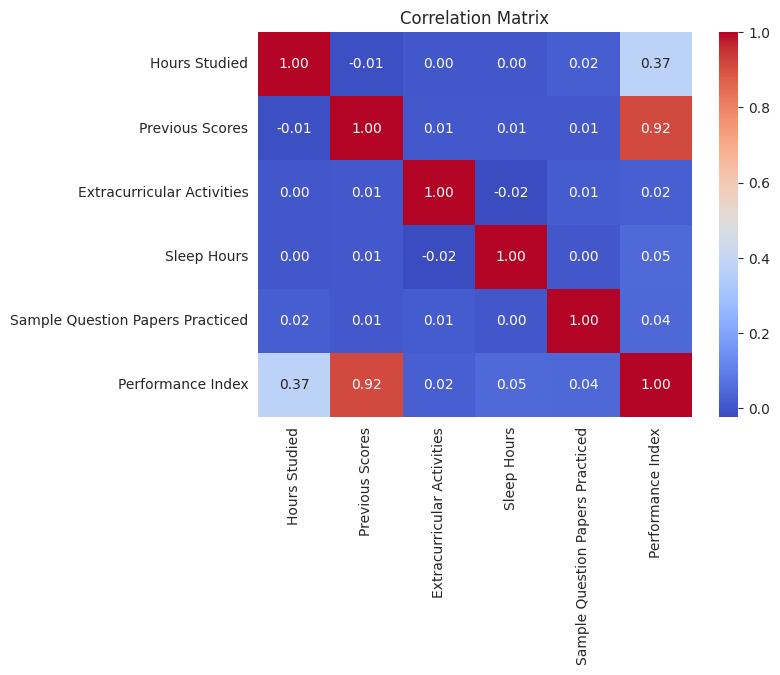

In [22]:
# Heatmap: Correlation Matrix
correlation_matrix = student_performance[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**The heatmap plot the correlation between the dependent and independents variables. Previoues scores has higher contribution of 92% to perfromance index follow by hours studied with 37% while the rest have almost zero effect on performance index.**

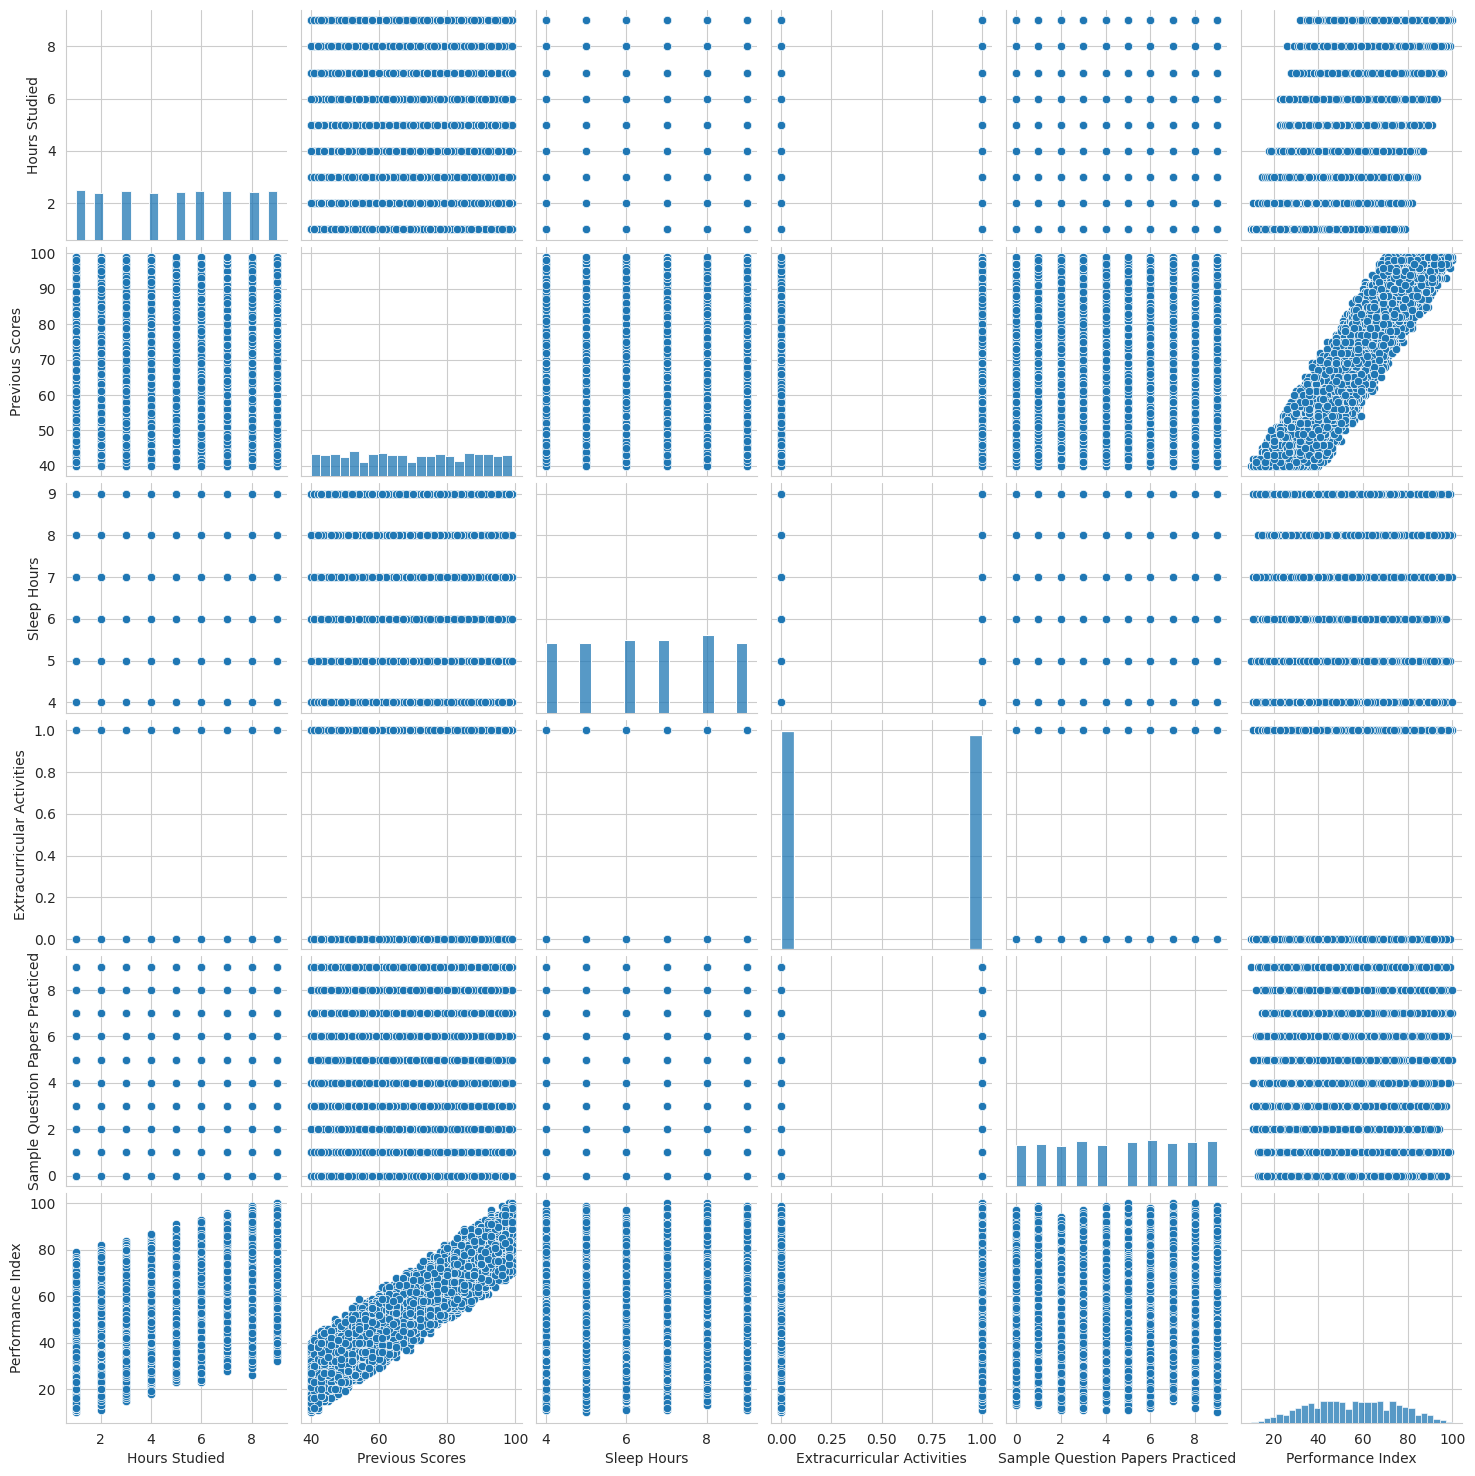

In [23]:
# Visualize pairwise relationships between the numerical variables
sns.pairplot(student_performance[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Extracurricular Activities', 'Sample Question Papers Practiced', 'Performance Index']])
#plt.title('Pairwise Relationships')
plt.show()

**The pairplot is a combination of scatter plot, which also have same interpretation with heatmap. The plot shows that Hours Studied and Previous Scores only contributed significantly to the performance index.**

### Training_the_Dataset_and_Modelling

I bin the Performance Index into categories which I have two target variables, Performance Index as continues and Performance Index Group as Categories. Either of the target variables can be use but this depends on the specific requirements and goals of my analysis.

**<font size=3>Binning the performance index:</font>**

**<font size=2>Interpretability</font>**: Binning the performance index into categories can make the predictions more interpretable, especially for stakeholders who may not be familiar with interpreting continuous numerical values.

**<font size=2>Simplicity</font>**: Categorizing the performance index can simplify the analysis and visualization process, making it easier to communicate the results.

**<font size=2>Insights</font>**: Binning can sometimes reveal patterns or insights that might not be as apparent when treating the variable as continuous.

**<font size=3>Leaving the performance index as continuous:</font>**

**<font size=2>Loss of Information</font>**: Binning the performance index can result in a loss of information, as you're essentially reducing the granularity of the data.

**<font size=2>Statistical Power**: Continuous variables can sometimes provide more statistical power in analyses compared to categorical variables.

**<font size=2>Model Flexibility</font>**: Some machine learning algorithms may perform better with continuous target variables rather than categorical ones.

Given these considerations, the goal is to provide a straightforward interpretation of the performance index and simplify the analysis, binning into categories could be a good approach, but I need to retain the granularity of the data and potentially leverage the full range of the performance index, leaving it as a continuous variable will be more appropriate for my analysis.


In [24]:
student_performance.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Performance Index Group'],
      dtype='object')

In [25]:
# Splitting data into Indipendent and Dependent Variable
X = student_performance.drop(["Performance Index","Performance Index Group"], axis=1)
y = student_performance["Performance Index"]

**I have decided to use performance index instead of performance index group as my dependent variable base on reason stated above, while i considered all the independent variables even though some did not contribute to the performance index significantly base on the correlation plot above.**

### The section below involves the designing, implementing, modelling and evaluation of results

In [26]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'Neural Networks': MLPRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print model name
    print(f"Model: {name}")
    
    # Print y_pred
    print("Predicted Values:")
    print(y_pred)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print("--------------------------")

Model: Linear Regression
Predicted Values:
[54.74728554 22.61884434 47.93665124 ... 33.42451751 67.92578967
 31.20587077]
Mean Squared Error (MSE): 4.066563824092682
R-squared (R2): 0.9890110607021136
--------------------------
Model: Random Forest
Predicted Values:
[55.96       21.49       46.51       ... 32.72       67.81083333
 28.32      ]
Mean Squared Error (MSE): 5.240032841314841
R-squared (R2): 0.9858400346575189
--------------------------
Model: Decision Tree
Predicted Values:
[55. 21. 45. ... 33. 70. 27.]
Mean Squared Error (MSE): 8.78712962962963
R-squared (R2): 0.9762548337418009
--------------------------
Model: SVR
Predicted Values:
[54.85717821 24.41554597 46.48089994 ... 33.10625472 68.55752266
 31.20279765]
Mean Squared Error (MSE): 5.517456100252952
R-squared (R2): 0.9850903630713431
--------------------------
Model: Neural Networks
Predicted Values:
[54.86487109 22.68597812 48.12725822 ... 33.62840295 68.04713394
 31.38122422]
Mean Squared Error (MSE): 4.106485177037

**The above result are the predicted value and performance metrics for each of the algorithms initiated.**

**The most highest R-squared and lowest Mean Squared Error indicate the best model.**

**From the above result, Linear regression has the highest R2 of 0.989 and lowest MSE of 4.066 which mean is the best model follow by Neural Network with R2 of 0.988 and MSE of 4.106.**

### The section below is the visualizations to compare the performance of different models using bar chart, also a scatter plot for performance index of actual and predicted value

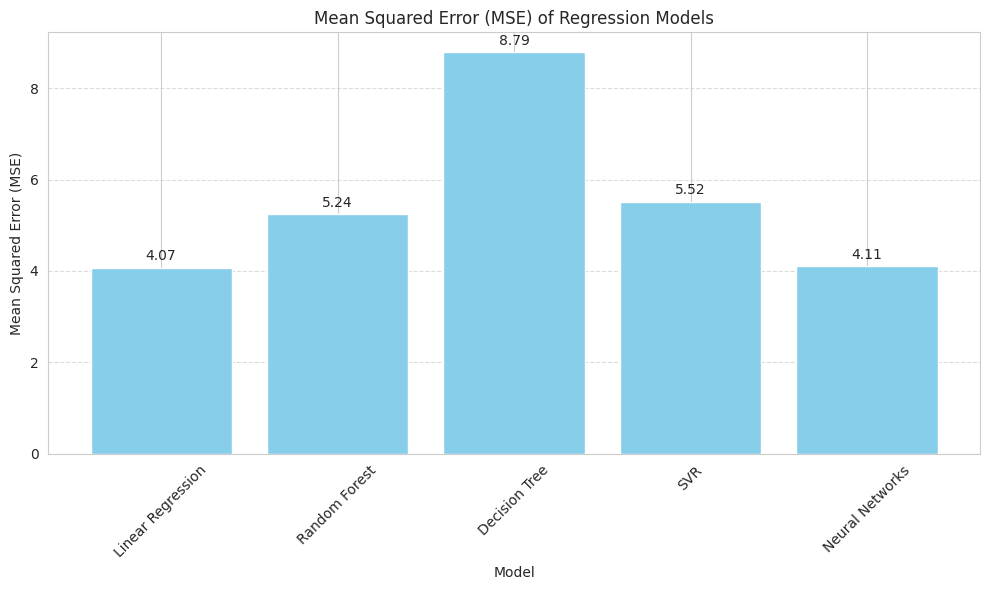

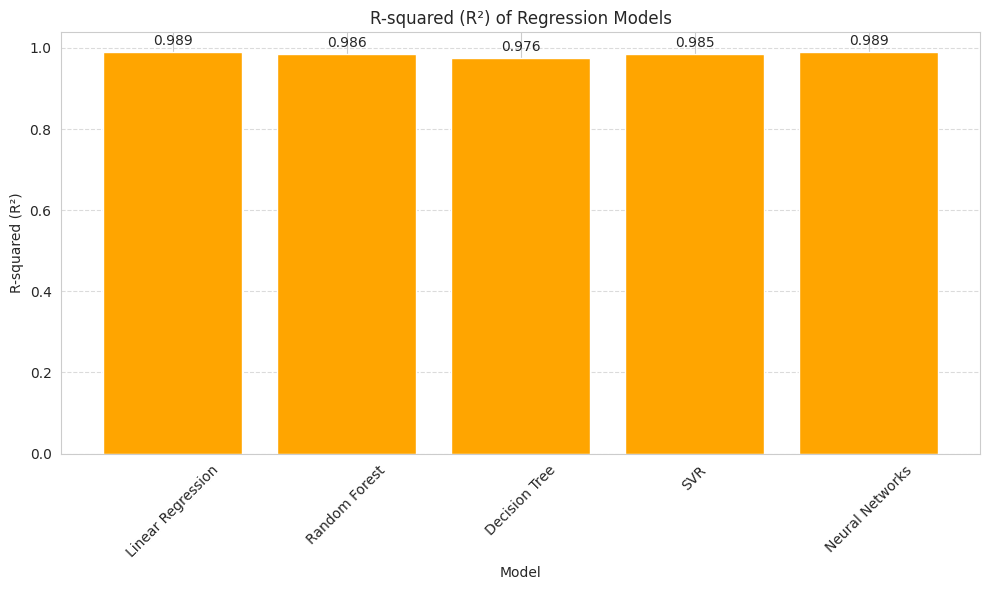

In [27]:
# Model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'SVR', 'Neural Networks']

# Mean Squared Error (MSE) values
mse_values = [4.066563824092695, 5.240032841314841, 8.78712962962963, 5.517456100252952, 4.106485177037647]

# R-squared (R²) values
r2_values = [0.9890110607021136, 0.9858400346575189, 0.9762548337418009, 0.9850903630713431, 0.9889031825663759]

# Plotting the Mean Squared Error (MSE) bar plot
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.bar(i, mse_values[i], color='skyblue', label='Mean Squared Error (MSE)')
    plt.text(i, mse_values[i] + 0.1, f'{mse_values[i]:.2f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of Regression Models')
plt.xticks(range(len(models)), models, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the R-squared (R²) bar plot
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.bar(i, r2_values[i], color='orange', label='R-squared (R²)')
    plt.text(i, r2_values[i] + 0.01, f'{r2_values[i]:.3f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('R-squared (R²)')
plt.title('R-squared (R²) of Regression Models')
plt.xticks(range(len(models)), models, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**This visualization allows me to easily compare the performance of different models based on their MSE and R² scores, the chart also shows that Linear Regression and Neural Networks are the best model with the highest value of R square and lowest value of Mean Square Error**

### The Chart below shows the relationship bewteen the actual and predicted value of performance index

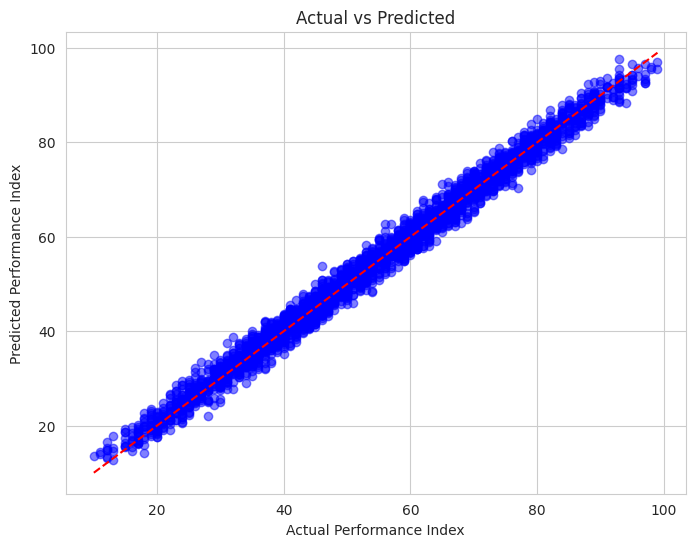

In [28]:
# Assuming y_test and y_pred are the actual and predicted values, respectively, for one of the models
# Replace y_test and y_pred with the actual and predicted values from your analysis output

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.grid(True)
plt.show()

In this scatter plot:

**1**.The x-axis represents the actual values of the target variable (e.g., Performance Index).

**2**.The y-axis represents the predicted values of the target variable generated by the regression model.

**3**.Each point on the plot represents an observation in the testing dataset, where the x-coordinate is the actual value and the y-coordinate is the predicted value.

**4**.The red dashed line represents the line of perfect prediction, where the actual and predicted values are the same. Points close to this line indicate accurate predictions, while points far from the line indicate discrepancies between actual and predicted values.

This visualization provides an intuitive way to assess the performance of my regression models by comparing the predictions to the actual values.

<Axes: xlabel='Performance Index', ylabel='Density'>

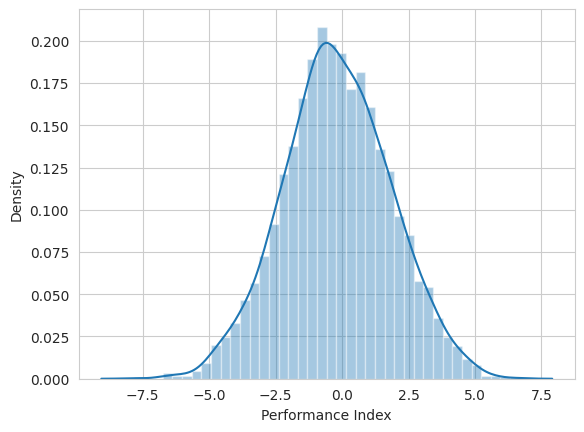

In [29]:
sns.distplot(y_test-y_pred)

The density plot shows the distribution of errors (residuals) between the actual and predicted values.

A normally distributed shape indicates that the errors are symmetrically distributed around zero, which is desirable for a well-performing model.

### Hyperparameter Tuning of the Model

In [30]:
# Define models and their corresponding parameter grids
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Random Forest', RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20]
    }),
    ('Decision Tree', DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10]
    }),
    ('SVR', SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    ('Neural Networks', MLPRegressor(random_state=42), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    })
]

# Perform Grid Search Cross-Validation for each model
best_models = {}
for name, model, param_grid in models:
    print(f"Hyperparameter tuning for {name}...")
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Print best hyperparameters
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    
    # Re-train model with best hyperparameters
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

# Evaluate the best models
for name, model in best_models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("--------------------------")
    
    # Print evaluation metrics
    print(f"Best Model: {name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print("--------------------------")


Hyperparameter tuning for Linear Regression...
Best hyperparameters for Linear Regression: {}
Hyperparameter tuning for Random Forest...
Best hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 150}
Hyperparameter tuning for Decision Tree...
Best hyperparameters for Decision Tree: {'max_depth': 10}
Hyperparameter tuning for SVR...
Best hyperparameters for SVR: {'C': 0.1, 'kernel': 'linear'}
Hyperparameter tuning for Neural Networks...
Best hyperparameters for Neural Networks: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
--------------------------
Best Model: Linear Regression
Mean Squared Error (MSE): 4.066563824092682
R-squared (R2): 0.9890110607021136
--------------------------
--------------------------
Best Model: Random Forest
Mean Squared Error (MSE): 4.803708190614086
R-squared (R2): 0.9870191001555975
--------------------------
--------------------------
Best Model: Decision Tree
Mean Squared Error (MSE): 6.363072228375324
R-squared (R2)

**The result above shows the improvement in performance metrics indicates that the hyperparameter tuning process was effective in optimizing the models. It suggests that the selected hyperparameters better suit the characteristics of the data and improve the models' ability to generalize to unseen data.**

**Even though the Linear Regression doesn't have hyperparameters to tune because it's a simple and straightforward model with no adjustable parameters. The Linear Regression model still remain the best base on the output of the result with the highest R2 and lowest MSE of hyperparameter tuning because it learns the coefficients for each feature directly from the data during training, without the need for additional parameters.**

## THANK YOU